In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from glob import glob
import cv2
from tqdm import tqdm
from tensorflow.keras.models import load_model

In [3]:
image_train_path = "Dataset/food_data/Train"
image_test_path = "Dataset/food_data/Test"
train_gen = ImageDataGenerator(rescale=1./255, fill_mode="reflect")
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
  image_train_path,
  target_size=(256, 256),
  batch_size=128,
)
validation_generator = test_gen.flow_from_directory(
  image_test_path,
  target_size=(256, 256),
  batch_size=128,
)

Found 4554 images belonging to 10 classes.
Found 496 images belonging to 10 classes.


In [4]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'ayam goreng krispi': 0, 'bakso': 1, 'burger': 2, 'kentang goreng': 3, 'nasi goreng': 4, 'nasi putih': 5, 'nugget': 6, 'pizza': 7, 'rawon daging sapi': 8, 'tempe goreng': 9}
{'ayam goreng krispi': 0, 'bakso': 1, 'burger': 2, 'kentang goreng': 3, 'nasi goreng': 4, 'nasi putih': 5, 'nugget': 6, 'pizza': 7, 'rawon daging sapi': 8, 'tempe goreng': 9}


e:\python\BANGKIT ACADEMY\TUGAS  AKHIR\env\lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


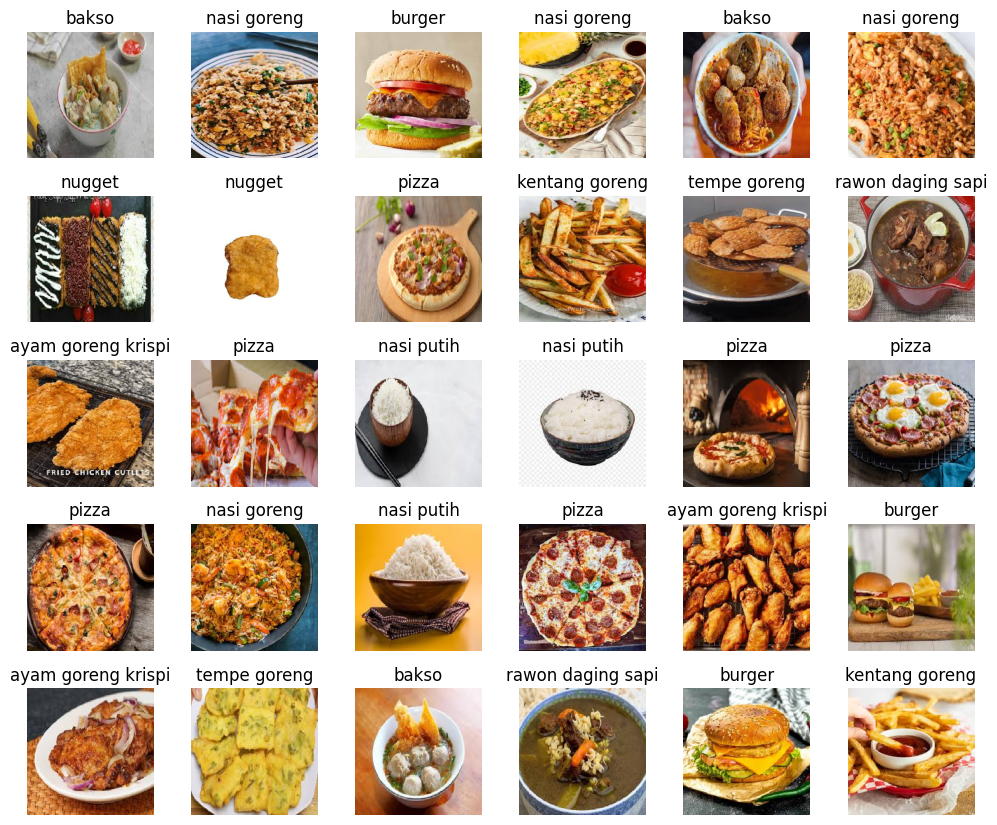

In [4]:
image, label = next(train_generator)
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(10, 10))

for i in range(30):
    img, label = next(train_generator)
    plt.subplot(6,6, i+1)
    plt.imshow(img[0])
    plt.title(class_names[label[0].argmax()])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [5]:
x_data = []
y_data = []

for category in glob(image_train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 461/461 [00:00<00:00, 503.99it/s] 


In [5]:
# Definisikan bentuk input menggunakan layer Input
input_shape = (256, 256, 3)
input_layer = tf.keras.layers.Input(shape=input_shape)

# Buat model Sequential
model = tf.keras.models.Sequential()

# Tambahkan layer Input sebagai layer pertama
model.add(input_layer)

# Tambahkan layer konvolusional dan lainnya
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,244,554 (100.12 MB)

 Trainable params: 26,244,554 (100.12 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Definisikan callbacks
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model = ModelCheckpoint(
    'cnn.keras',
    monitor='val_loss',
    save_best_only=True
)

In [11]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=30, callbacks=[best_model, early_stopping_monitor])

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.1320 - loss: 3.5583 - val_accuracy: 0.2097 - val_loss: 2.6124
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 244s 7s/step - accuracy: 0.2558 - loss: 2.4814 - val_accuracy: 0.4375 - val_loss: 1.9350
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 244s 7s/step - accuracy: 0.3857 - loss: 2.0533 - val_accuracy: 0.4879 - val_loss: 1.8073
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 247s 7s/step - accuracy: 0.4895 - loss: 1.7640 - val_accuracy: 0.5887 - val_loss: 1.5392
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.5701 - loss: 1.5816 - val_accuracy: 0.6492 - val_loss: 1.2714
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 242s 7s/step - accuracy: 0.5921 - loss: 1.4478 - val_accuracy: 0.6794 - val_loss: 1.2122
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 242s 7s/step - accuracy: 0.6514 - loss: 1.2962 - val_accuracy: 0.7218 - val_loss: 1.0920
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.6855 - loss: 1.2009 - val_accuracy: 0.7198 - v

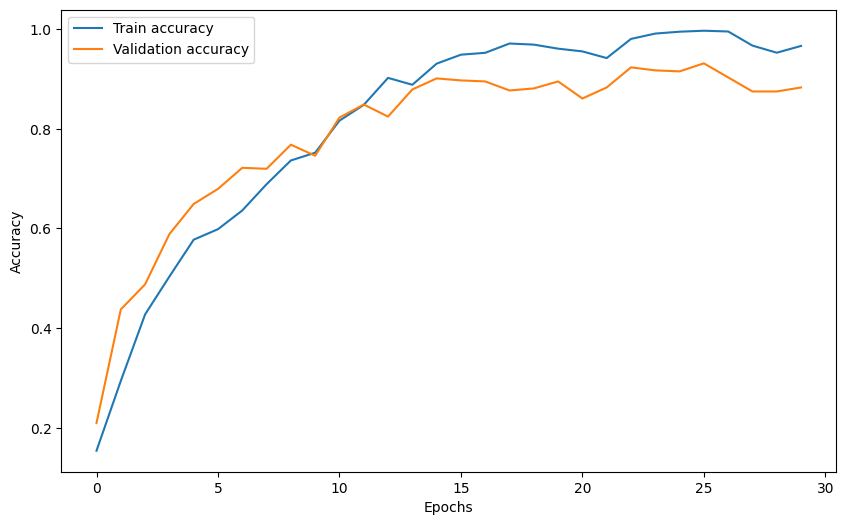

In [12]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

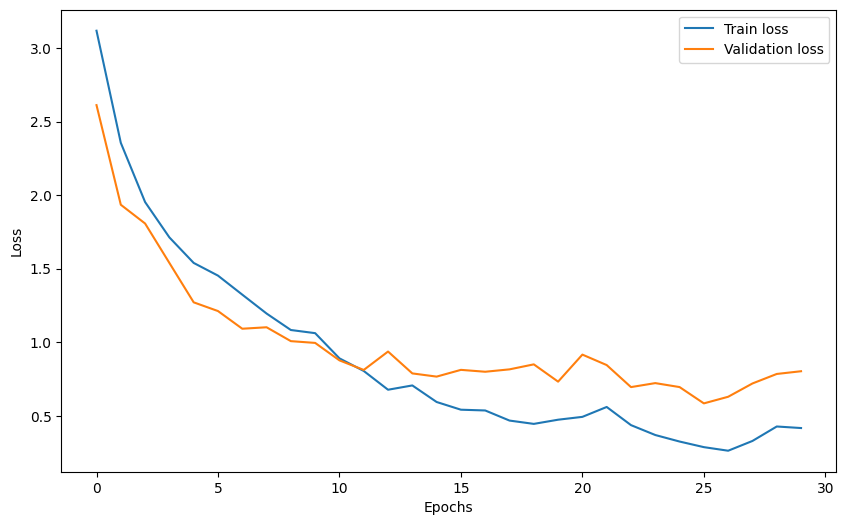

In [13]:
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model.save("food_image.h5")

In [6]:
model.load_weights('food_image.h5')
model.evaluate(validation_generator)

e:\python\BANGKIT ACADEMY\TUGAS  AKHIR\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9348 - loss: 0.5904


[0.5843332409858704, 0.9314516186714172]

In [7]:
image,labels =next(validation_generator)
predictions = model.predict(image)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step


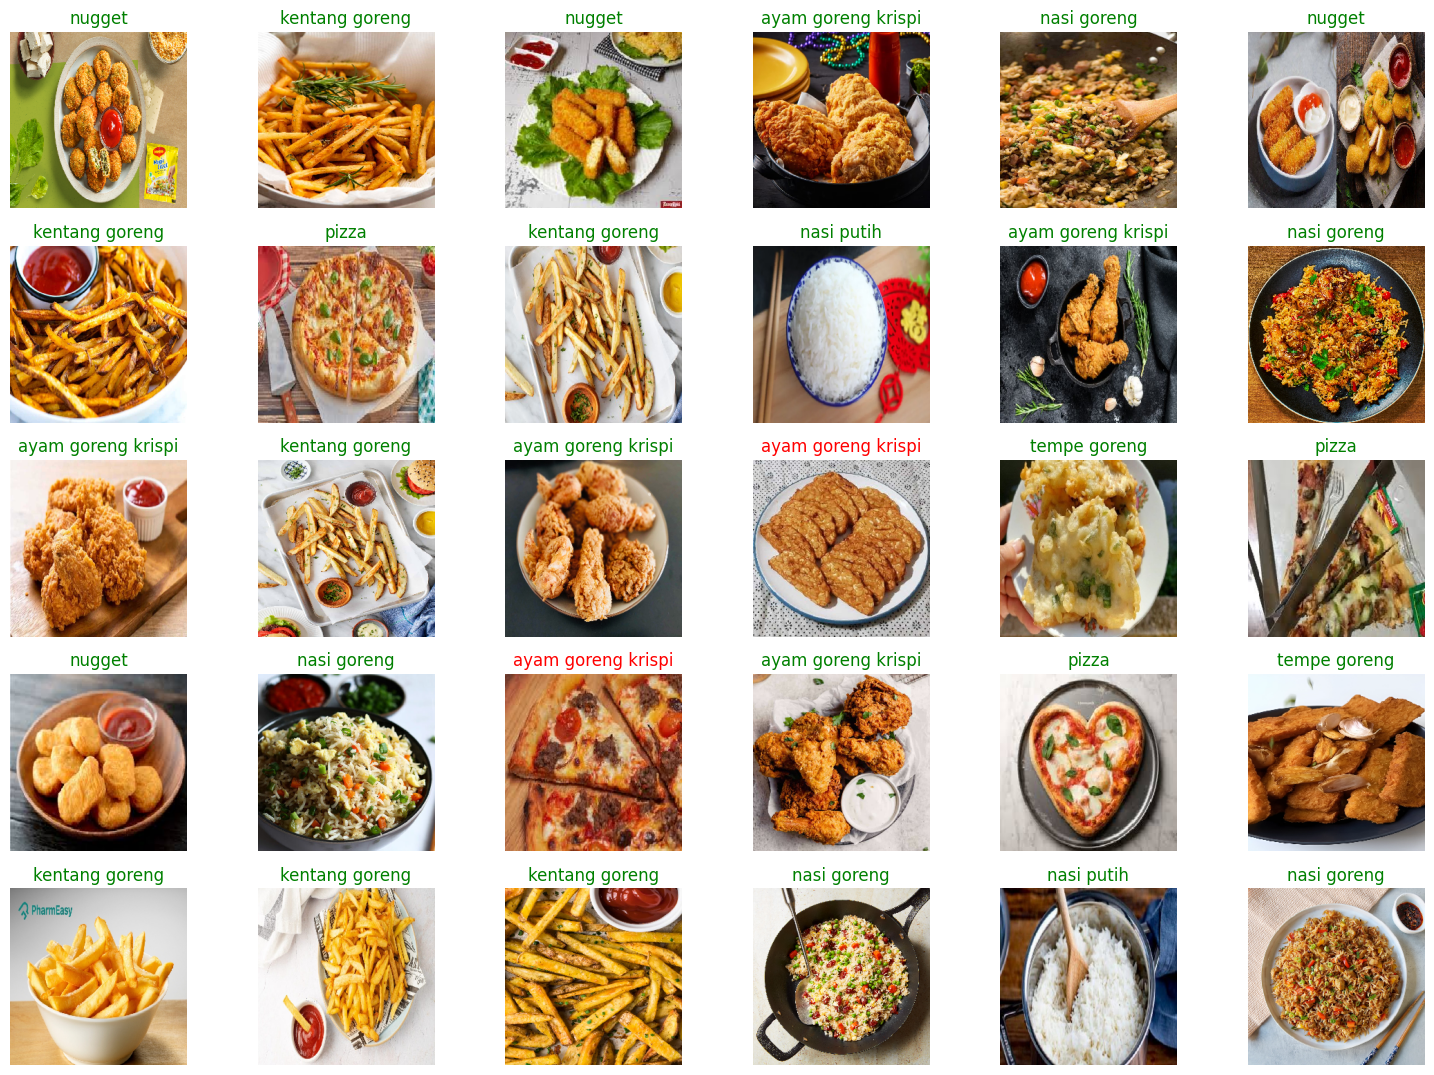

In [8]:
predictions = model.predict(image)

class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15, 13))
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(image[i])

    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(labels[i])

    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.title(class_names[pred_label], color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [14]:
# Memuat model yang telah dilatih
model = load_model('food_image.h5')

# Memuat dan mengubah ukuran gambar baru
new_image_path = 'tempe.jpeg'
new_image = load_img(new_image_path, target_size=(256, 256))
new_image_array = img_to_array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)

# Melakukan prediksi pada gambar baru
predictions = model.predict(new_image_array)

# Mendapatkan kelas dengan probabilitas tertinggi
class_names = list(train_generator.class_indices.keys())
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Menampilkan hasil prediksi
print("Prediksinya adalah :", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Prediksinya adalah : tempe goreng


In [16]:
model = load_model('food_image.h5')

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
with open('food_image.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpfed_ho0c\assets


INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpfed_ho0c\assets


Saved artifact at 'C:\Users\PC\AppData\Local\Temp\tmpfed_ho0c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1872618896576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872618901696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872618912960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872618931824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872618940096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872618941152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872618942384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872635727360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872635734752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1872635735632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  187263